# Bank Marketing Classification

In this part of the assignment we want to do a classification task using PyTorch on bank marketing dataset.

#Import Library

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

#Load Dataset
Here, you should download and load the dataset. After that, you should split train dataset to train and validation sets. Finally, define the dataloaders for `train`, `validation` and `test`

In [2]:
df = pd.read_csv("./bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#Normalize data
normalize numerical data.

In [3]:
scaler = StandardScaler()
encoder = LabelEncoder()

conts_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
df[conts_cols] = scaler.fit_transform(df[conts_cols])

categories = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
df = pd.get_dummies(df, columns=categories)

df['y'] = encoder.fit_transform(df['y'])

X = df.drop('y', axis=1)
y = df['y']
X = X.astype(np.float32)
y = y.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Create Data Loader
create data loader for pytorch

In [4]:
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
X_val = torch.tensor(X_val.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=81, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=81, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=81, shuffle=False)

print("Number of batches in train loader: ", len(train_loader))
print("Number of batches in val loader: ", len(val_loader))
print("Number of batches in test loader: ", len(test_loader))

Number of batches in train loader:  335
Number of batches in val loader:  112
Number of batches in test loader:  112


#Model
define your model in here

In [5]:
class BankMarketingNet(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.fc1 = nn.Linear(in_dim, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 4)
        self.fc4 = nn.Linear(4, 1)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

#Train your model
Define `criterion` and `optimizer`.
Train your model

Tasks:
- [ ] Things that are needed to be printed in each epoch:
  - Number of epoch
  - Train loss
  - Validation loss
- [ ] save train/validation loss (of each epoch) in an array for later usage

In [6]:
model = BankMarketingNet(X_train.shape[1])

optimizer = optim.Adam(model.parameters(), lr=0.0005)
criterion = nn.BCELoss()

train_losses = []
val_losses = []
for epoch in range(25):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * len(X_batch)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            val_loss += loss.item() * len(X_batch)
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)
    
    if val_loss == min(val_losses):
        torch.save(model.state_dict(), 'saving.pth')

    print(f'Epoch: {epoch+1}/{25},\nTraining Loss:\t {train_loss:0.20f},\nValidation Loss: {val_loss:0.20f}')
    print("#####################################################################################################")

Epoch: 1/25,
Training Loss:	 0.29162491505252419177,
Validation Loss: 0.22682770429390428091
#####################################################################################################
Epoch: 2/25,
Training Loss:	 0.22150089788759236287,
Validation Loss: 0.22074102361172970310
#####################################################################################################
Epoch: 3/25,
Training Loss:	 0.21570953433837569690,
Validation Loss: 0.21379126458074687589
#####################################################################################################
Epoch: 4/25,
Training Loss:	 0.21091715633799956731,
Validation Loss: 0.21231421534844638344
#####################################################################################################
Epoch: 5/25,
Training Loss:	 0.20654355185804734729,
Validation Loss: 0.21032048167330821831
#####################################################################################################
Epoch: 6/25,
Training Los

### Visualize Loss plot

Using the arrays that you have (from previous task in the above section), visualize Loss plot (train and validation together)

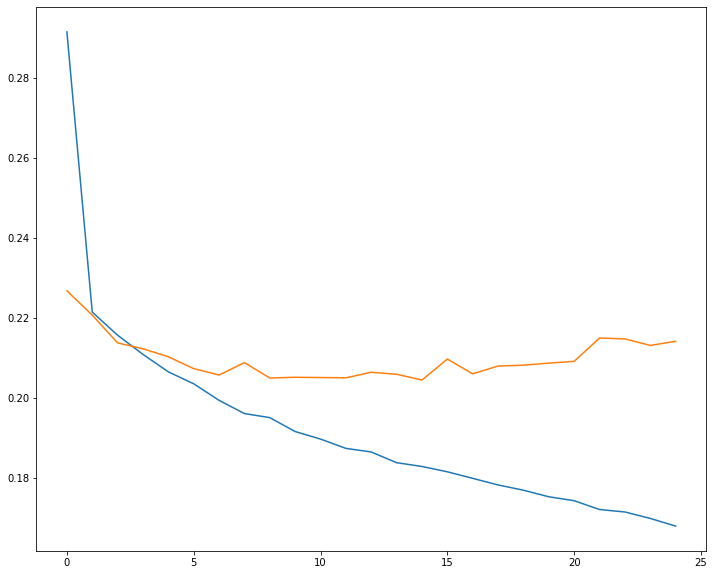

In [7]:
plt.figure(figsize=(12, 10))
plt.plot(train_losses, label='train loss')
plt.plot(val_losses, label='val loss')
plt.show()

## Evaluation

Test your trained model (using the Test Dataloader that you have).

In [8]:
#TODO
model.load_state_dict(torch.load('saving.pth'))
model.eval()
test_loss = 0
y_true = []
y_pred = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(model(X_batch).cpu().numpy())
        loss = criterion(model(X_batch), y_batch)
        test_loss += loss.item() * len(X_batch)
test_loss /= len(test_loader.dataset)

y_true = np.array(y_true).reshape(-1)
y_pred = np.array(y_pred).reshape(-1)
y_pred = np.where(y_pred > 0.5, 1, 0)

accuracy = (y_true == y_pred).mean()

print('Accuracy:', accuracy * 100)

Accuracy: 90.95432931549264
